In [163]:
import numpy as np
from astropy.coordinates import Angle
from astropy.io import fits
from astropy import units as u 
from ants import absInt, fluxInt, headPlay, fitsPlay #radiobs modules

import pyregion
import aplpy

from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm


fl = fluxInt.fluxint()
hp = headPlay.headplay()
fp = fitsPlay.fitsplay()


get_ipython().magic(u'pylab inline')


#home = '/Users/'
home = '/home/'


rootDir = home+'maccagni/Projects/MFS/FornaxA/centreHI/'
cubeDir = rootDir+'cubes/'
contDir = rootDir+'continuum/'

momDir = rootDir+'moments/'
h2h1Dir = rootDir+'H2H1/'
plotDir = home+'maccagni/Projects/MFS/FornaxA/centreHI/plots/H2H1Plots/'



FA_radeg = 50.67375
FA_decdeg = -37.2083
BeamRa = 50.699035
BeamDec =-37.228974


print('''\n\t+---------+\n\t Inputs loaded\n\t+---------+''')




Populating the interactive namespace from numpy and matplotlib

	+---------+
	 Inputs loaded
	+---------+


In [78]:
h2SurfBright = momDir+'surfBright_CO_rg.fits'
h1SurfBright = momDir+'surfBright_20asec.fits'
h2h1Ratio = h2h1Dir+'h2h1Ratio.fits'

h2Overh1 = fp.divFits(h2SurfBright,h1SurfBright,h2h1Ratio)


print '''\n\t+---------+\n\t H2/H1 ratio done\n\t+---------+'''


	+---------+
	 H2/H1 ratio done
	+---------+


In [103]:
h2SurfBrightSigma = momDir+'surfBright_CO_rg-3sigma.fits'
h1SurfBrightSigma = momDir+'surfBright_20asec-3sigma.fits'
h2h1RatioSigma = h2h1Dir+'h2h1Ratio-3sigma.fits'

h2Overh1 = fp.divFits(h2SurfBrightSigma,h1SurfBrightSigma,h2h1RatioSigma)
print '''\n\t+---------+\n\t H2/H1 ratio done\n\t+---------+'''


	+---------+
	 H2/H1 ratio done
	+---------+


In [80]:
#----------------------#
# rc param initialize
#----------------------#
params = {'figure.figsize'      : '10,10',
          'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 3,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

print '''\n\t+---------+\n\t Matplotlib initialized\n\t+---------+'''


	+---------+
	 Matplotlib initialized
	+---------+


BMAJ	23.660002
BMIN	19.710000

	+---------+
	 mom0 HI 10asec
	 Done
	+---------+


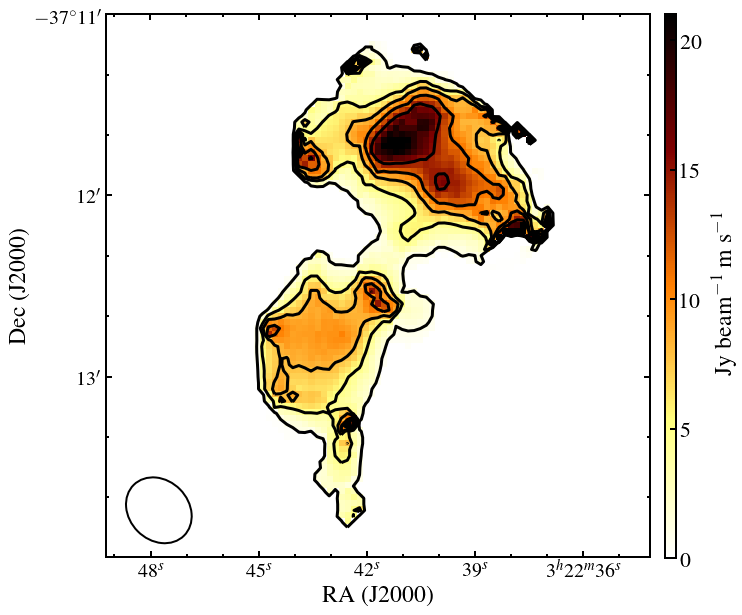

In [81]:
#----------------------#
# H2/H1
#----------------------#
outPlot_10asec = plotDir+'h2h1.pdf'
imageName = h2h1Ratio
fig = plt.figure()

f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

img = plt.imshow(f22, cmap="afmhot_r",vmin=0,vmax=21)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks =  [0,5,10,15,20],
                    orientation='vertical', format='%.1d')
ax = cbar.ax
#ax.text(3.9,0.5,r'H$_2$/H$_{\rm I}$',rotation=90)
ax.text(4.1,0.6,r'Jy beam$^{-1}$ m s$^{-1}$',rotation=90)


#FA_radeg = 50.673825
#FA_decdeg = -37.204227
#BeamRa = 50.694035
#BeamDec = -37.220974
f1 = aplpy.FITSFigure(imageName, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'linear',vmin=0,vmax=21)



f1.show_contour(imageName,levels=[1, 5, 8, 11, 15], colors='black')
#f1.show_contour(imageName,levels=[1e-3, 1e-2, 1e-1,5e-1], colors='black')


f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_10asec,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t mom0 HI 10asec\n\t Done\n\t+---------+'''

0.19006648724140074
BMAJ	23.660002
BMIN	19.710000

	+---------+
	 mom0 HI 10asec
	 Done
	+---------+


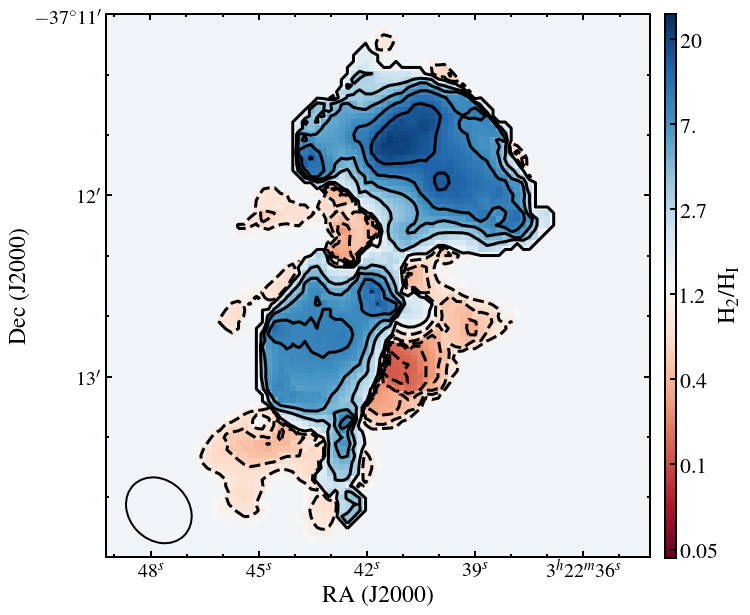

In [159]:
#----------------------#
# H2/H1
#----------------------#
outPlot_10asec = plotDir+'h2h1-3sigma.pdf'
surfBrightNorm=h2h1Dir+'h2h1-3sigmaNorm.fits'

imageName = h2h1RatioSigma

fig = plt.figure()

f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

#normalized = (f22-np.min(f22))/(np.max(f22)-np.min(f22))
#value = (1.20933-np.min(f22))/(np.max(f22)-np.min(f22))
print np.log(1.20933)



normalized = np.log(f22)

fits.writeto(surfBrightNorm,normalized,h22,overwrite=True)


img = plt.imshow(normalized, cmap="RdBu",vmin=-3.1
,vmax=3.29006648724140074)
plt.gca().set_visible(False)
cax = plt.axes([0.912, 0.124, 0.015, 0.755])
cbar = plt.colorbar(cax=cax,ticks =[-3,-2,-1,0,1.,2,3],
                    orientation='vertical', format='%.1d')

ax = cbar.ax
#ax.text(3.9,0.5,r'H$_2$/H$_{\rm I}$',rotation=90)
ax.text(5.,0.5,r'H$_2$/H$_{\rm I}$',rotation=90)
ax.set_yticklabels(['0.05', '0.1', '0.4', '1.2', '2.7', '7.','20'])


#FA_radeg = 50.673825
#FA_decdeg = -37.204227
#BeamRa = 50.694035
#BeamDec = -37.220974
imageName = surfBrightNorm

f1 = aplpy.FITSFigure(imageName, figure=fig)
f1.set_theme('publication')

f1.frame.set_linewidth(2)

f1.recenter(FA_radeg,FA_decdeg,width=0.05,height=0.05)
f1.show_colorscale(aspect='equal', cmap='RdBu',vmin=-3.1
,vmax=3.29006648724140074)



f1.show_contour(imageName,levels=[.19006648724140074,1.2,1.7,2.2,2.7,3.2], colors='black')
f1.show_contour(imageName,levels=[-1.8,-1.4,-1.0,-0.6,-0.2], colors='black')


f1.show_ellipses(BeamRa, BeamDec, h22['BMAJ'], h22['BMIN'], angle=h22['BPA'], edgecolor='black',linewidth=2 )


f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm:ss')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal') 
f1.ticks.set_color('k')
f1.ticks.set_length(6)  # points
f1.ticks.set_linewidth(2)  # points
f1.ticks.set_minor_frequency(3)
f1.ticks.show()

fig.savefig(outPlot_10asec,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


print('BMAJ\t{0:f}'.format(h22['BMAJ']*3600.))
print('BMIN\t{0:f}'.format(h22['BMIN']*3600.))

print '''\n\t+---------+\n\t mom0 HI 10asec\n\t Done\n\t+---------+'''